<a href="https://colab.research.google.com/github/Sean-Reinhardt/Reinhardt-Sean/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile

import skimage.filters as skf

import skimage.morphology as skm

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# We need to convert the image HEIC formats to something more usual. Stack overflow suggests to use PIL for that. So we installs that.
!pip install pillow_heif 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Task 1: Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them.

In [ ]:
import os
from PIL import Image
import pillow_heif


folder_path = '/content/drive/MyDrive/datascience/codingtask2/'

heic_files_found = False # Flag to keep track if any HEIC files are found

for filename in os.listdir(folder_path):
    if filename.endswith('.HEIC'):
        heif_file = pillow_heif.read_heif(folder_path + filename)
        image = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data.tobytes(), "raw")
        
        url_name = filename.split('.')[0] + '.png'
        image.save(folder_path + url_name, format="png")
        
        heic_files_found = True # Set the flag to True if at least one HEIC file is found
    print(url_name)
if not heic_files_found:
    print("No HEIC files found in the specified folder.")

IMG_5383.png
IMG_5384.png
IMG_5385.png
IMG_5386.png
IMG_5381.png
IMG_5382.png
IMG_5390.png
IMG_5392.png
IMG_5393.png
IMG_5379.png
IMG_5380.png
IMG_5388.png
IMG_5389.png
IMG_5387.png


Task 2: With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image.

In [17]:
!pip install pyheif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


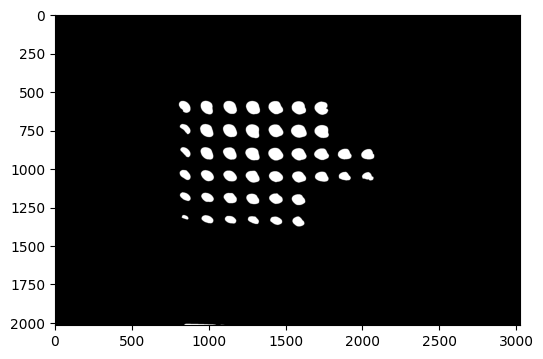

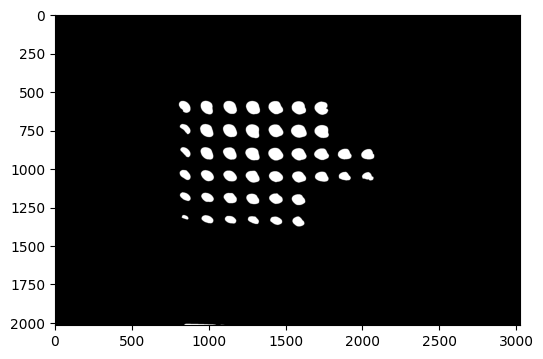

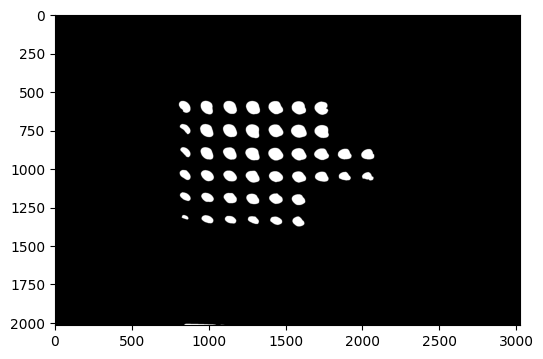

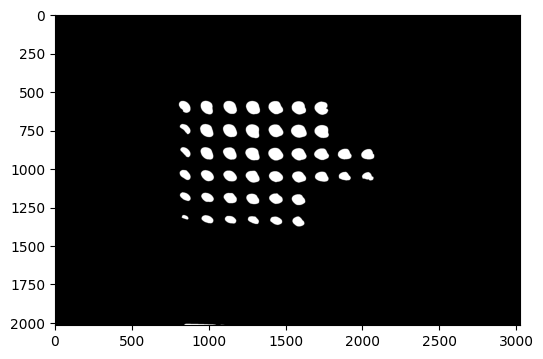

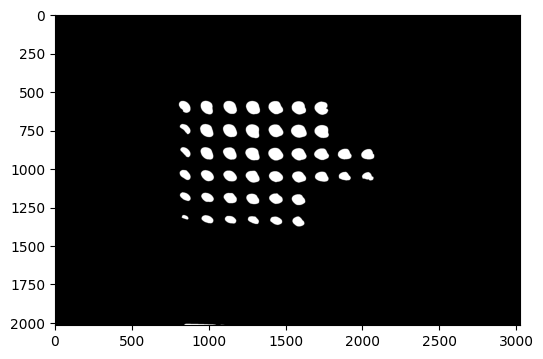

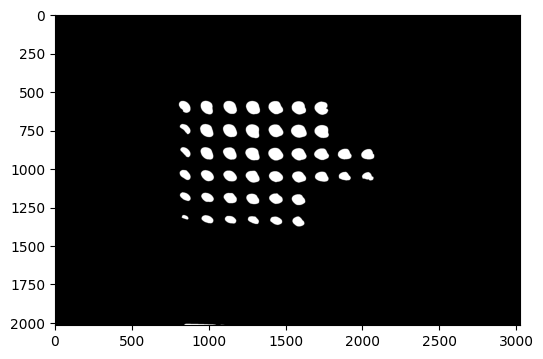

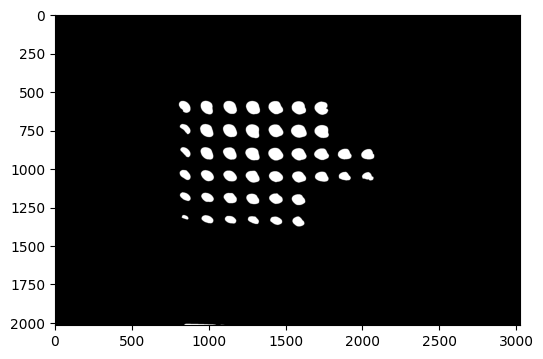

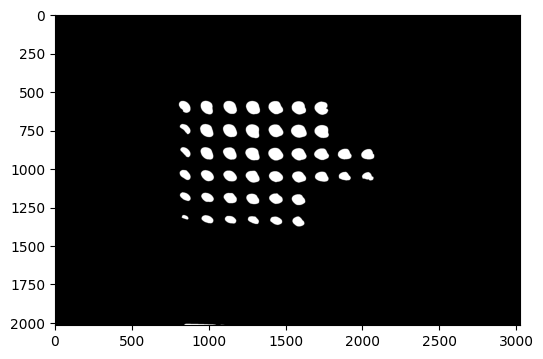

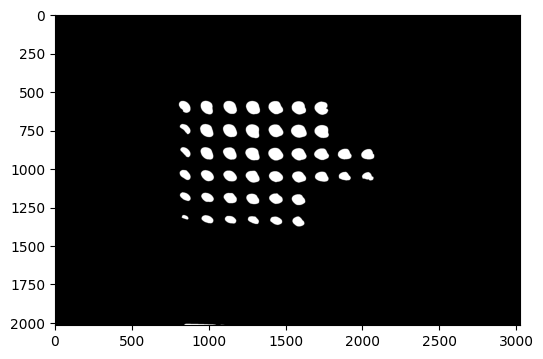

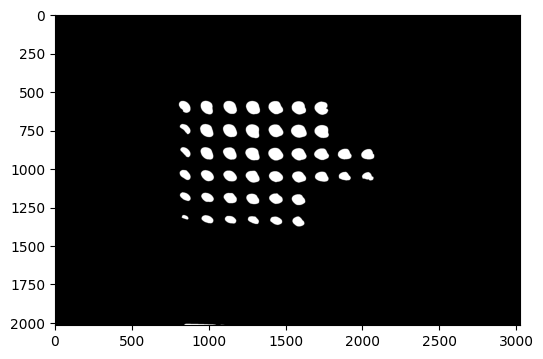

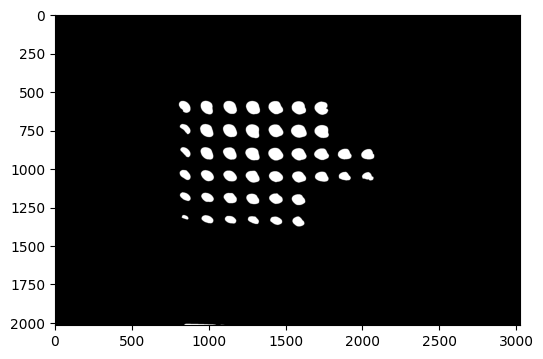

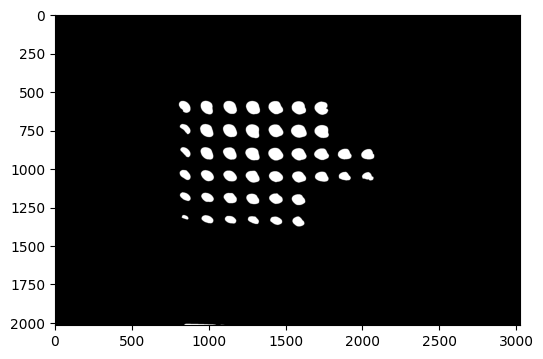

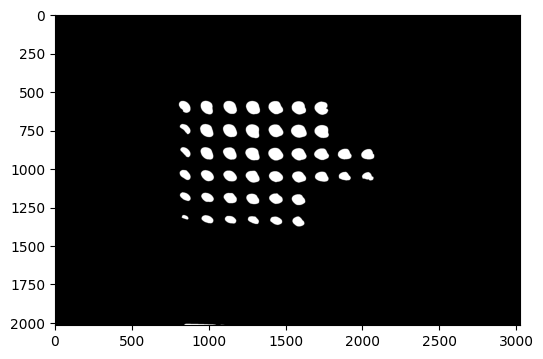

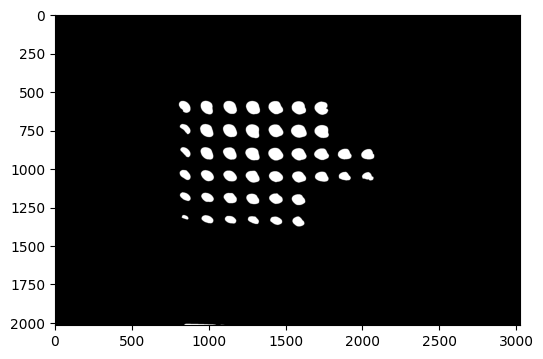

<ipython-input-19-ec3ddb59ebee>:24: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(20))


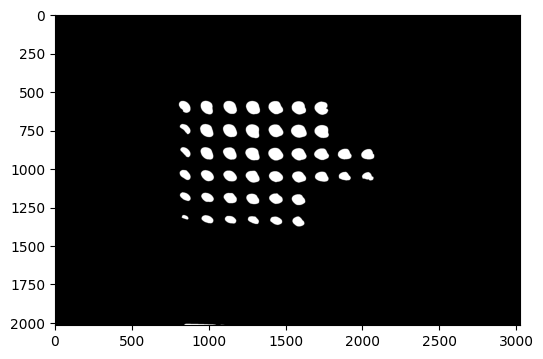

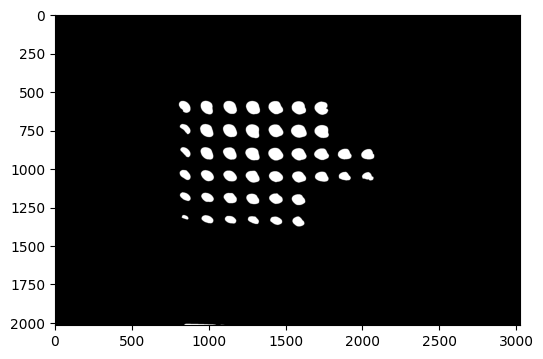

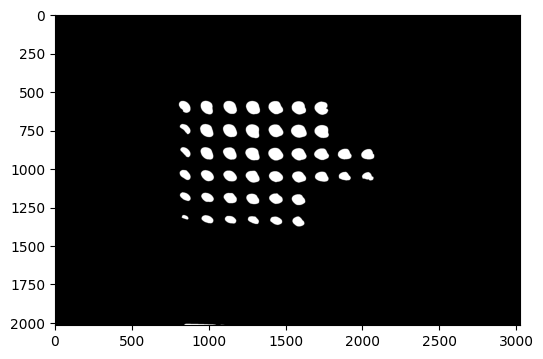

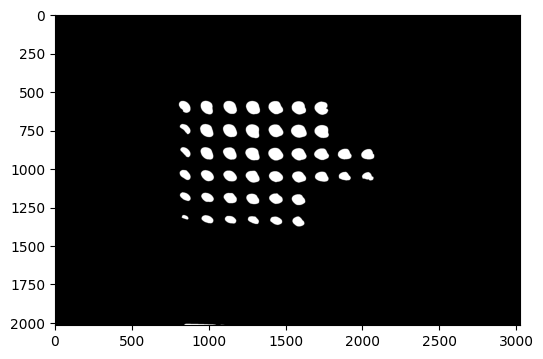

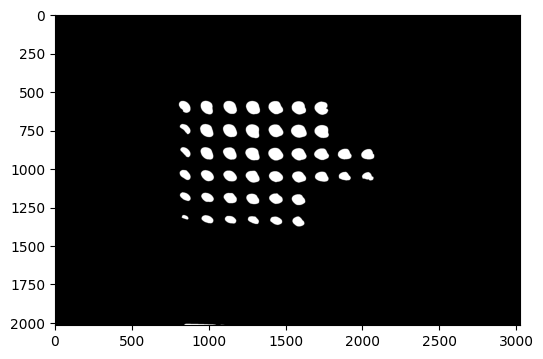

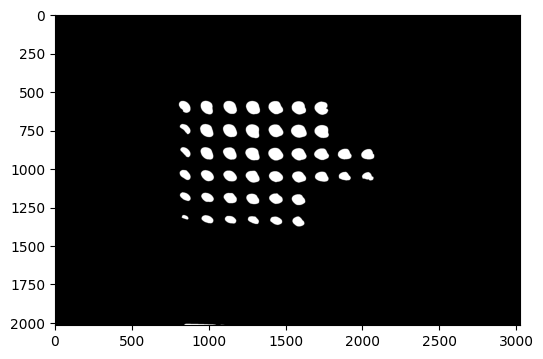

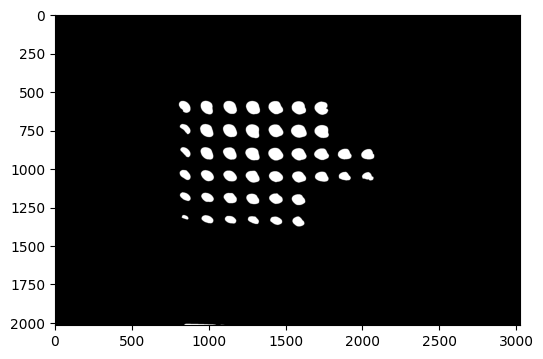

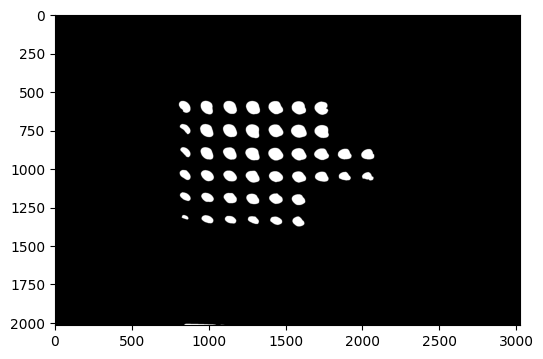

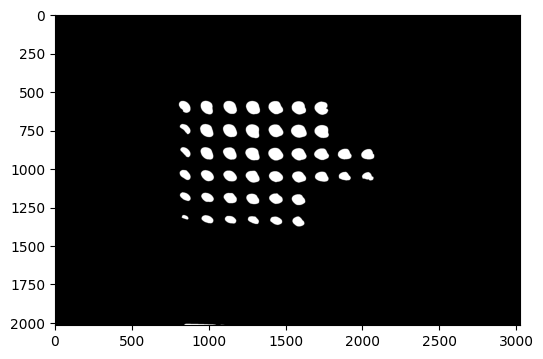

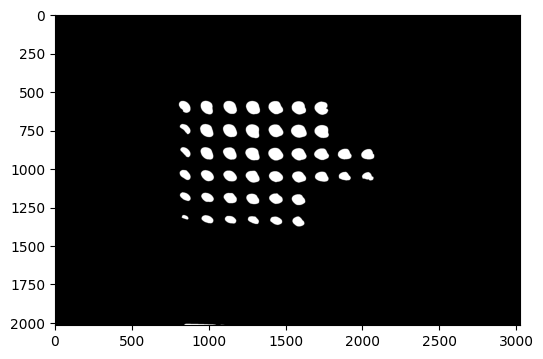

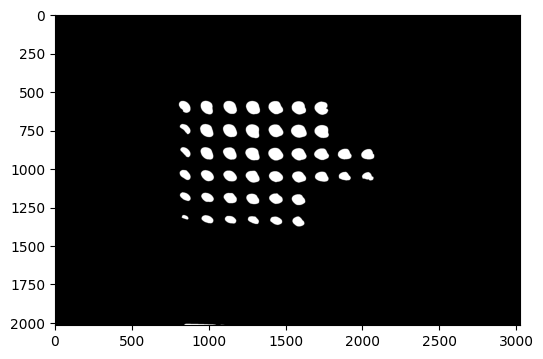

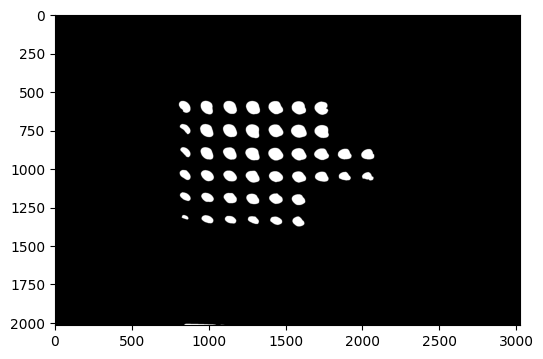

In [ ]:
import os
from PIL import Image
import pillow_heif
from skimage import io

threshold_manual = 60

folder_path = '/content/drive/MyDrive/datascience/codingtask2/'

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        #heif_file = pillow_heif.read_heif(folder_path + filename)
        #image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data.tobytes(),"raw",)
       
        #####
        #load image and show the B channel
        imageRGB  = io.imread(folder_path + url_name)
        image = imageRGB[:,:,2]
        #####
        # Crop the top part and display the lower half
        #image = image.crop((0, image.size[1]//2, image.size[0], image.size[1]))
        image = image[image.shape[0]//2:image.shape[0],:]
         # There are some reflections or white dots in the black bins. Let's try to get rid of them with a filter.
        image_mean = skf.median(image,selem=skm.disk(20))

        #create a mask using a logical operation
        image_threshold = image_mean<threshold_manual

    plt.figure(figsize=(6, 6))
    plt.imshow(image_threshold, cmap ='gray')
    plt.show()
        


Task 3: Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google.

In [ ]:
from skimage import io, measure
folder_path = '/content/drive/MyDrive/datascience/codingtask2/'

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
      # Load the image
      image = io.imread(folder_path + url_name)

      # Threshold the image to convert it to binary
      binary = image > threshold_value

      # Label the connected components
      labels = measure.label(binary)

      # Count the number of connected components
      num_blobs = labels.max()

      print(num_blobs)




Task 4: Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good